# Criando um modelo de Regressão Linear
#### Temos um dataSet com dados de produto em uma determinada loja.  Temos o preço, desconto e quantidade de vendas do produto.  Uma campanha de natal nas lojas será feita com o preço de 17.50 e desconto de até 40 centavos e precisamos prever as vendas para manter o estoque da loja

In [90]:
import pandas as pd

In [91]:
dados = pd.read_excel("./dadosVenda.xlsx")
dados.head(3)

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
0,1,21.85,23,1.15,81
1,2,4.30,5,0.70,3361
2,3,13.65,15,1.35,1551


## Trtamento dos dados

In [92]:
# Verificando as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1606 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


In [93]:
dados[dados.Desconto.isnull()]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
18,19,22.0,22,NaN,228
23,24,9.0,9,NaN,2607
45,46,19.0,19,NaN,777
46,47,13.0,13,NaN,1875
64,65,23.0,23,NaN,45
177,178,5.0,5,NaN,3339
327,328,21.0,21,NaN,411
440,441,13.0,13,NaN,1875
452,453,18.0,18,NaN,960
515,516,15.0,15,NaN,1509


**Tratando valores vazios**

In [94]:
# Ajustando os dados com valores de desconto vazio
#dados[dados.Desconto.isnull()] = 0
dados.loc[dados.Desconto.isnull(),"Desconto"] = 0

In [95]:
# Verificando novamente as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1634 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


## Entendendo a base

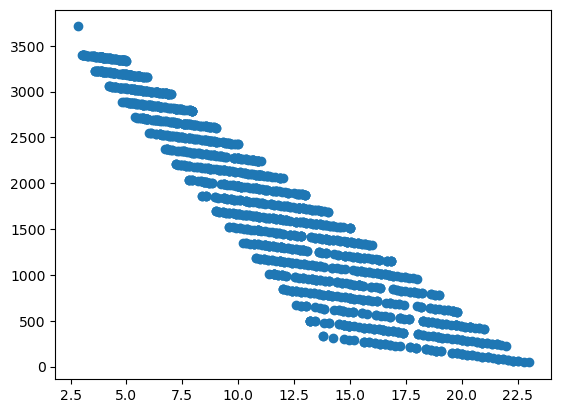

In [96]:
# Podemos fazer o scatter plot
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

ax.scatter(dados.PrecoVenda, dados.VendaQtd)

plt.show()

### Definição do modelo
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [97]:
# Importando o LinearRegression
from sklearn.linear_model import LinearRegression

### Escolhendo entradas pro modelo
- Vamos usar PrecoOriginal e Desconto

In [98]:
# Dados
X2 = dados[["PrecoOriginal","Desconto"]]
y2 = dados.VendaQtd

In [99]:
# Fazendo o fit
reg2 = LinearRegression().fit(X2, y2)

In [100]:
# Resultado
# Acertando 99.99%
reg2.score(X2, y2)

0.9999999083594651

In [101]:
# Coeficiente angular
reg2.coef_

array([-182.99974391,   31.00137454])

In [102]:
# Coeficiente linear 
reg2.intercept_

4254.00024394365

### Fazendo predição

In [103]:
# Criando valores para predição

valores = {
    'valores': [17.50, 17.40, 17.30, 17.20, 17.10],
    'PrecoOriginal': [17.50,17.50,17.50,17.50,17.50],
    'Desconto': [0,0.1,0.2,0.3,0.4]
}

valores = pd.DataFrame(valores)

In [104]:
# Fazendo a predição
reg2.predict(valores[["PrecoOriginal","Desconto"]])

array([1051.50472554, 1054.604863  , 1057.70500045, 1060.8051379 ,
       1063.90527536])

### Analisando erros


In [105]:
# Verificando novamente os dados para comparar com os modelos
dados[(dados.PrecoOriginal >= 17) & (dados.PrecoOriginal <= 18) & (dados.Desconto >= 0) & (dados.Desconto <= 0.4)]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
108,109,16.83,17,0.17,1148
284,285,16.66,17,0.34,1154
452,453,18.00,18,0.00,960
989,990,16.83,17,0.17,1148
998,999,16.83,17,0.17,1148
1115,1116,17.82,18,0.18,966
1220,1221,17.64,18,0.36,971
1539,1540,16.66,17,0.34,1154
1548,1549,16.66,17,0.34,1154
1576,1577,16.83,17,0.17,1148


### Mas acima so temos as 5 primeiros linhas, queremos ver os erros em todos os itens
##### Vamos usar o erro medio absoluto


In [106]:
from sklearn.metrics import mean_absolute_error

### Adicionando coluna predição

In [107]:
dados['y_model2'] = reg2.predict(dados[["PrecoOriginal","Desconto"]])
dados.head()

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd,y_model2
0,1,21.85,23,1.15,81,80.657715
1,2,4.30,5,0.70,3361,3360.702487
2,3,13.65,15,1.35,1551,1550.855941
3,4,4.97,7,2.03,3036,3035.934827
4,5,9.60,10,0.40,2436,2436.403355


##### Vamos passar como paremetro os dados verdadeiros e os dados que foram previstos

In [108]:
# para o modelo 2
mean_absolute_error(dados.VendaQtd, dados.y_model2)

0.24931777290881982

#### Notamos que o erro é minimo

### Fazendo o erro medio absoluto por Porcentagem

In [109]:
from sklearn.metrics import mean_absolute_percentage_error

In [110]:
# para o modelo 2
mean_absolute_percentage_error(dados.VendaQtd, dados.y_model2)*100

0.027306697265631803